In [1]:
import pickle
from TQ_cycle_benchmarking import CB_Experiment
from selene_sim import DepolarizingErrorModel, Stim
from selene_custom_error_model import (
    BasicErrorModel,
    OneQubitErrorRates,
    TwoQubitErrorRates,
)

In [2]:
# select parameters and build experiment

qubits = [(0,1), (2,3), (4,5), (6,7)]
seq_lengths = [4, 100, 200]
filename = 'exp_CB_example.p'

exp = CB_Experiment(qubits, seq_lengths, filename=filename)
exp.add_settings()

Having setup our cycle benchmarking experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [3]:
# setup error model

p_2q = TwoQubitErrorRates(
    ix=0.0001,
    iy=0.0001,
    iz=0.0002,
    xi=0.0001,
    xz=0.0001,
    yi=0.0001,
    yz=0.0001,
    zi=0.0002,
    zx=0.0001,
    zy=0.0001,
    zz=0.00005,
    # anything you don't set is 0 by default
)

error_model = BasicErrorModel(
    random_seed=1234,
    #one_qubit_error_rates=p_1q,
    two_qubit_error_rates=p_2q,
    #p_init=0.001,
    #p_meas=0.002,
)


In [4]:
# simulate experiment

shots = 1000
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/24 circuits complete
2/24 circuits complete
3/24 circuits complete
4/24 circuits complete
5/24 circuits complete
6/24 circuits complete
7/24 circuits complete
8/24 circuits complete
9/24 circuits complete
10/24 circuits complete
11/24 circuits complete
12/24 circuits complete
13/24 circuits complete
14/24 circuits complete
15/24 circuits complete
16/24 circuits complete
17/24 circuits complete
18/24 circuits complete
19/24 circuits complete
20/24 circuits complete
21/24 circuits complete
22/24 circuits complete
23/24 circuits complete
24/24 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [2]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

🌐 Browser log in initiated.


╭────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                        │
│         Confirm that the browser shows the following code and click 'allow device':    │
│                                                                                        │
│                                      gwkRhM                                            │
│                                                                                        │
╰────────────────────────────────────────────────────────────────────────────────────────╯

Browser didn't open automatically? Use this link: https://qa.myqos.com/auth/device/browser?otp=gwkRhMDWxgJ0dttAXob3pknSbIffzATSKLV_vZf7Jl0GyM3yqaP7lQKJ8Y1NykRLjVwPd73lVhIyOAkN8UBEjA
✅ Successfully logged in as karl.mayer@quantinuum.com using the browser.


In [3]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='CB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [5]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [11]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 5, 23, 2, 28, 35, 493394, tzinfo=datetime.timezone.utc), queued_time=None, submitted_time=datetime.datetime(2025, 5, 22, 19, 34, 28, 277975, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 5, 22, 19, 35, 5, 31120, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [9]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

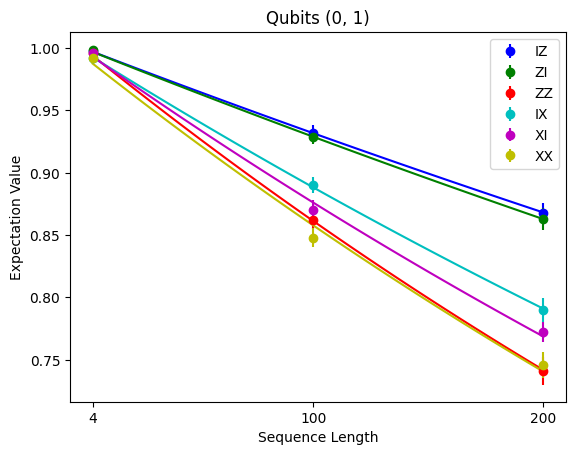

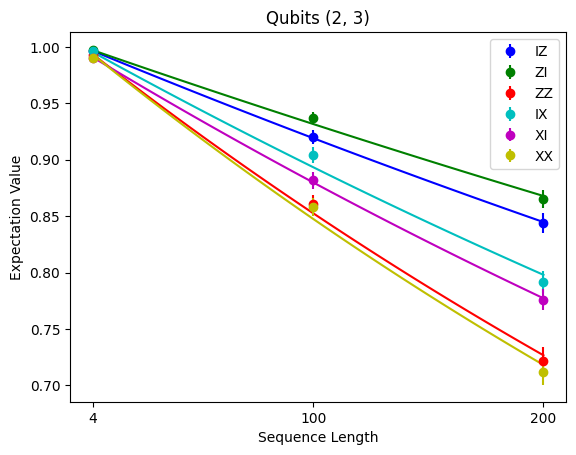

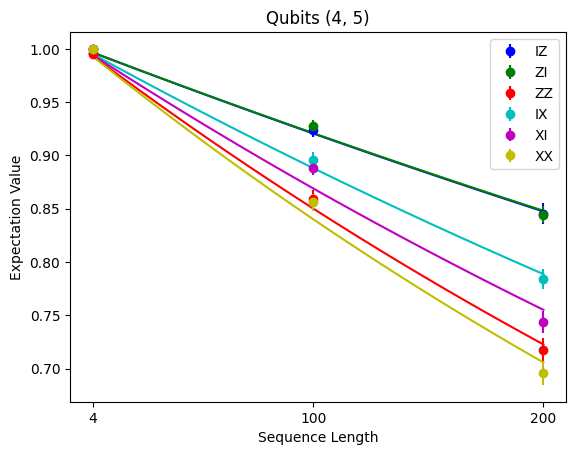

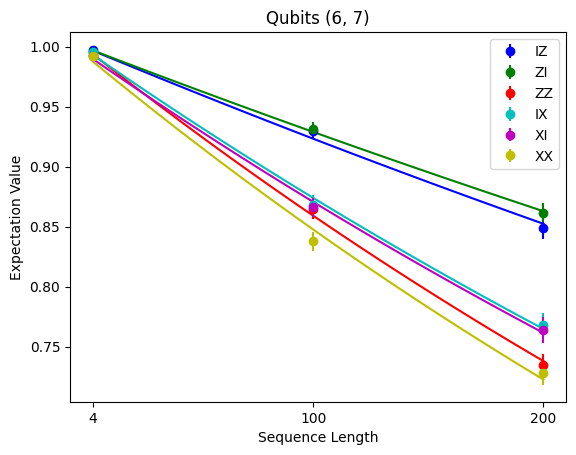

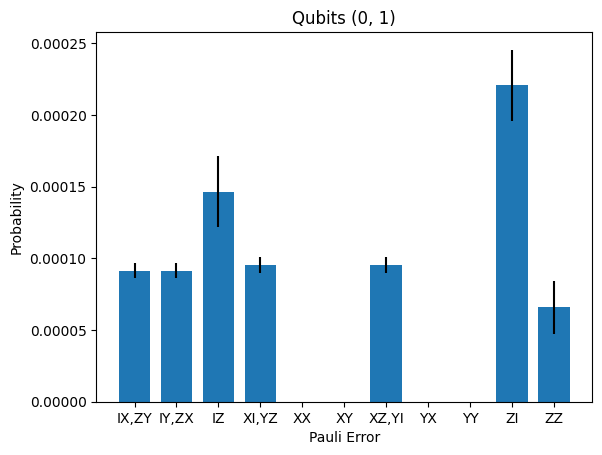

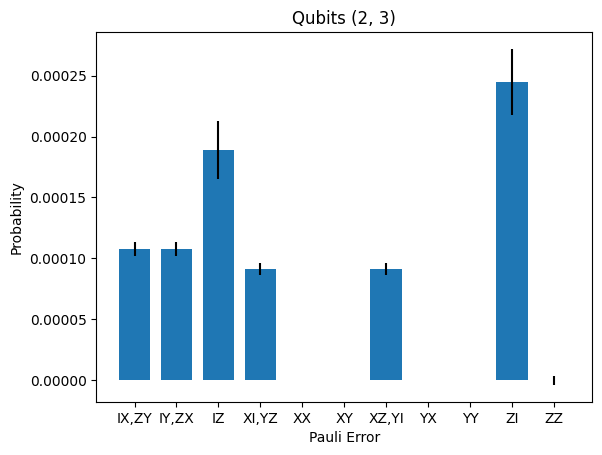

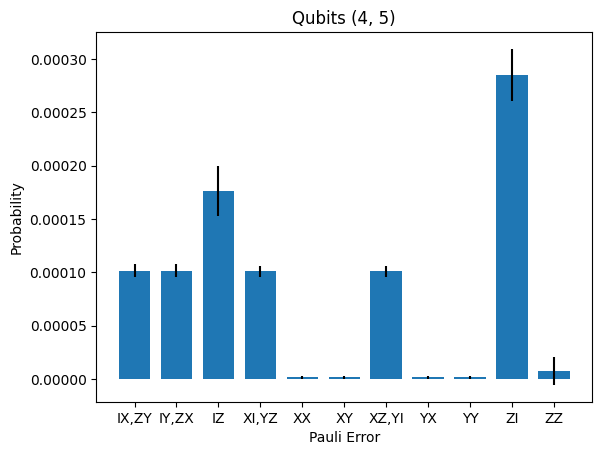

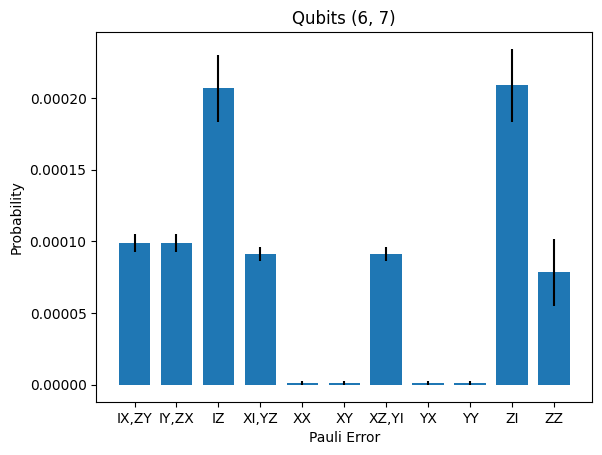

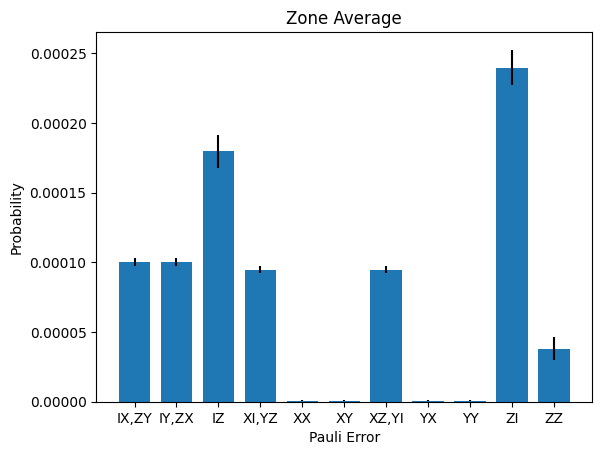

Average Fidelity
--------------------------
(0, 1): 0.99906 +/- 3e-05
(2, 3): 0.99901 +/- 3e-05
(4, 5): 0.99897 +/- 3e-05
(6, 7): 0.99899 +/- 3e-05

Zone Average:
0.99901 +/- 1e-05


In [6]:
exp.analyze_results(plot_orbits=True)

In [7]:
# print estimated Pauli errors

P_probs = exp.mean_Pauli_probs
P_stds = exp.mean_Pauli_stds

for P in P_probs:
    print(f'{P}: {round(P_probs[P], 6)} +/- {round(P_stds[P], 6)}')

IX: 0.0001 +/- 3e-06
IY: 0.0001 +/- 3e-06
IZ: 0.00018 +/- 1.2e-05
XI: 9.5e-05 +/- 3e-06
XX: 1e-06 +/- 1e-06
XY: 1e-06 +/- 1e-06
XZ: 9.5e-05 +/- 3e-06
YI: 9.5e-05 +/- 3e-06
YX: 1e-06 +/- 1e-06
YY: 1e-06 +/- 1e-06
YZ: 9.5e-05 +/- 3e-06
ZI: 0.00024 +/- 1.3e-05
ZX: 0.0001 +/- 3e-06
ZY: 0.0001 +/- 3e-06
ZZ: 3.8e-05 +/- 8e-06


In [ ]:
# save experiment object to working directory

exp.save()